In [13]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [14]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [45]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
prev_year = dt.date(2017, 6, 23) - dt.timedelta(days=365)
results = session.query(Measurement.date, Measurement.tobs)
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= prev_year).all()

In [46]:
#  3. Convert the June temperatures to a list.
df = pd.DataFrame(results, columns=['Date','Temperature'])

In [47]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','Temperature'])
print(df)

            date  Temperature
0     2016-06-23         79.0
1     2016-06-24         77.0
2     2016-06-25         78.0
3     2016-06-26         79.0
4     2016-06-27         80.0
...          ...          ...
2606  2017-08-19         71.0
2607  2017-08-20         78.0
2608  2017-08-21         76.0
2609  2017-08-22         76.0
2610  2017-08-23         76.0

[2611 rows x 2 columns]


,Temperature
count,1453.000000
mean,74.050241
std,4.885700
min,58.000000
25%,71.000000
50%,74.000000
75%,78.000000
max,87.000000


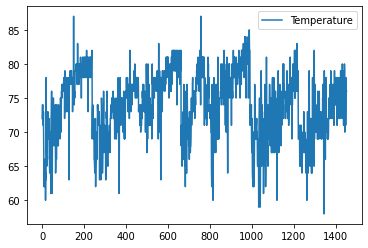

In [59]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df = df.sort_index()
df.plot()
df.describe()


,Temperature
count,2611.000000
mean,75.032938
std,4.512867
min,58.000000
25%,72.000000
50%,76.000000
75%,78.000000
max,87.000000


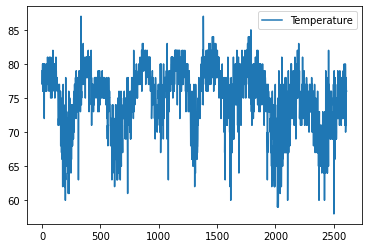

In [32]:
df.plot()
df.describe()

## D2: Determine the Summary Statistics for December

In [51]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
prev_year = dt.date(2017,12, 23) - dt.timedelta(days=365)
results = session.query(Measurement.date, Measurement.tobs)
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= prev_year).all()

In [52]:
# 7. Convert the December temperatures to a list.
df = pd.DataFrame(results, columns=['Date','Temperature'])

In [53]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results, columns=['date','Temperature'])
print(df)

            date  Temperature
0     2016-12-23         72.0
1     2016-12-24         74.0
2     2016-12-25         74.0
3     2016-12-26         74.0
4     2016-12-27         74.0
...          ...          ...
1448  2017-08-19         71.0
1449  2017-08-20         78.0
1450  2017-08-21         76.0
1451  2017-08-22         76.0
1452  2017-08-23         76.0

[1453 rows x 2 columns]


,Temperature
count,1453.000000
mean,74.050241
std,4.885700
min,58.000000
25%,71.000000
50%,74.000000
75%,78.000000
max,87.000000


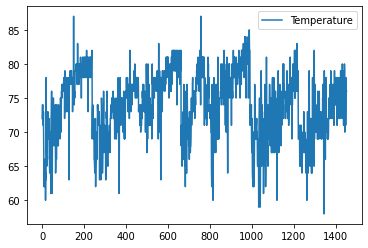

In [58]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df = df.sort_index()
df.plot()
df.describe()
